#  Initial Modeling/Benchmarks

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [55]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
X_train = pd.read_csv('./output/X_train_sc.csv')
X_val = pd.read_csv('./output/X_val_sc.csv')
X_test = pd.read_csv('./output/X_test_sc.csv')

In [20]:
y_train = pd.read_csv('./output/y_train.csv')
y_val = pd.read_csv('./output/y_val.csv')

## Baseline Model

Our baseline model assumes that saleprice will be the mean for all houses.

In [25]:
y_base = [y_train.mean()] * len(y_val)

In [26]:
r2_score(y_base,y_val)

-7.25199860654408e+30

In [27]:
mean_squared_error(y_base,y_val,squared=False)

78375.26238032707

Baseline model has terrible R^2.  
The MSE is not particularly great, but not terrible either.
The natural variance in the dataset is around 78k.  
We can still do much better than this with our model.

## Linear Regression

In [28]:
# Check shapes

X_train.shape,X_val.shape,y_train.shape,y_val.shape

((1538, 155), (513, 155), (1538, 1), (513, 1))

In [29]:
scores = []

In [30]:
# Instantiate linear model 
lr = LinearRegression()
model = 'lr'
params = 'NA'

# Fit to train
lr.fit(X_train,y_train)

# Training score
train = lr.score(X_train,y_train)

#  Predict target
y_pred = lr.predict(X_val)

# Test score
test = lr.score(X_val,y_val)

# MSE
mse = mean_squared_error(y_val,y_pred,squared=False)

# Add to list
scores.append([model,params,train,test,mse])
scores

[['lr', 'NA', 0.8894472186766949, 0.8342182814924959, 31904.60548995268]]

In [31]:
lr.coef_

array([[-5.39843455e+02,  3.86043656e+03,  1.19694872e+03,
         2.42964251e+03,  1.95433834e+03, -1.01946881e+03,
        -1.26756661e+01, -5.51542722e+02, -2.64305935e+02,
         3.89676238e+03,  1.29988528e+03,  2.41993007e+03,
         4.36663776e+02,  1.30924815e+03, -4.90331741e+02,
         2.08525322e+02,  1.64885981e+02,  3.97832402e+03,
        -3.23641130e+03, -4.72136248e+02,  1.01481686e+03,
         5.03079899e+03, -2.26119694e+03,  3.75337146e+02,
        -8.75990925e+02,  1.40513828e+03,  2.37302057e+03,
         1.59315907e+02,  8.18909403e+03,  1.16695183e+04,
        -3.52693823e+03,  5.97654203e+02, -3.72554357e+02,
         5.79359275e+02,  1.00606475e+04,  1.67629860e+03,
         2.10113216e+03, -6.84627287e+02,  1.62357074e+03,
         2.22565294e+03, -2.03297868e+03, -6.20286273e+02,
        -8.58781145e+02, -5.04544802e+02,  2.93532227e+02,
         9.97831853e+02,  2.70852095e+02, -3.46904785e+02,
        -1.48608147e+03, -2.70264664e+01, -5.86727330e+0

In [32]:
# Combine coefficients with feature names

lr_coef = pd.DataFrame(lr.coef_.reshape(-1,1),X_train.columns,columns=['coef'])

In [33]:
# Sort to find coefficients with greatest absolute value - most significant

lr_coef.sort_values(by = 'coef', key = abs, ascending=False).head(10)

,coef
remainder__totrms_abvgrd,13292.023045
ohe__neighborhood_NridgHt,11669.518274
ohe__neighborhood_StoneBr,10060.647459
remainder__exter_qual,9702.231729
remainder__full_bath,9069.096310
remainder__misc_val,-8595.765924
ohe__bldg_type_TwnhsE,-8538.709250
remainder__garage_area,8376.290156
ohe__neighborhood_NoRidge,8189.094033
remainder__mas_vnr_area,7779.744699


In [35]:
#  Sort to find coefs with least abs, least significant

lr_coef.sort_values(by = 'coef', key = abs, ascending=True)

,coef
ohe__lot_config_FR3,-12.675666
ohe__bldg_type_Duplex,-27.026466
ohe__electrical_FuseF,30.275740
ohe__exterior_1st_ImStucc,-36.054533
ohe__foundation_Stone,53.190130
...,...
remainder__full_bath,9069.096310
remainder__exter_qual,9702.231729
ohe__neighborhood_StoneBr,10060.647459
ohe__neighborhood_NridgHt,11669.518274


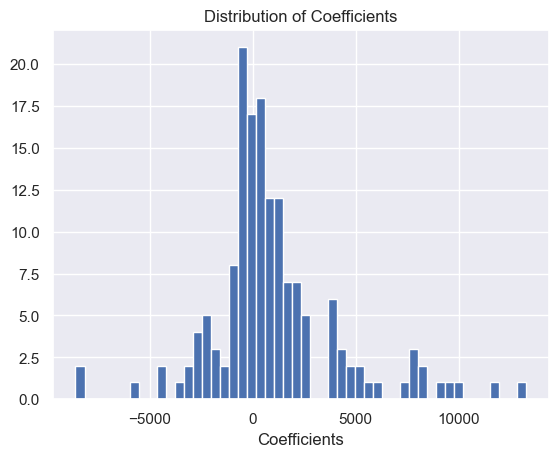

In [49]:
lr_coef.hist(bins=50)
plt.title('Distribution of Coefficients')
plt.xlabel('Coefficients');


Linear model has an MSE of less than 32k.  It is slightly overfit.
The model explains approximately 89% of the variance in the training data and approximately 83% of the variance in the test data.

Coefficients are close to normally distributed, centered close to 0.

The top 3 significant features are total rooms above ground and two different neighborhoods.

According to this model, keeping all other variables constant, an extra above ground room is worth about 13k, location in 
Northridge Heights is worth about 11.7k and location in Stone Brook is worth about 10k.

## Ridge

In [43]:
# Instantiate

ridge = Ridge()
model = 'ridge'
params = []

#  Fit
ridge.fit(X_train,y_train)

# Training score
train = ridge.score(X_train,y_train)

# Predict target
y_pred = ridge.predict(X_val)

# Test score
test = ridge.score(X_val,y_val)

# MSE
mse = mean_squared_error(y_val,y_pred,squared=False)

# Add to list
scores.append([model,params,train,test,mse])
scores

[['lr', 'NA', 0.8894472186766949, 0.8342182814924959, 31904.60548995268],
 ['ridge', [], 0.8894469814275529, 0.8342708849271849, 31899.54333653741]]

In [44]:
#  Combine coefs with features in dataframe

ridge_coef = pd.DataFrame(ridge.coef_.reshape(-1,1),X_train.columns,columns=['coef'])

In [45]:
ridge_coef.sort_values(by = 'coef', key = abs, ascending=False).head(10)

,coef
remainder__totrms_abvgrd,13267.074237
ohe__neighborhood_NridgHt,11651.359095
ohe__neighborhood_StoneBr,10045.099318
remainder__exter_qual,9699.868845
remainder__full_bath,9058.921313
remainder__misc_val,-8580.492875
ohe__bldg_type_TwnhsE,-8517.093413
remainder__garage_area,8372.951186
ohe__neighborhood_NoRidge,8178.345243
remainder__mas_vnr_area,7777.580837


In [46]:
ridge_coef.sort_values(by = 'coef', key = abs, ascending=False).tail(10)

,coef
remainder__bsmt_cond,125.984902
remainder__enclosed_porch,115.431514
ohe__sale_type_CWD,70.293808
ohe__electrical_SBrkr,-67.973826
ohe__paved_drive_P,-58.614923
ohe__foundation_Stone,52.413094
ohe__exterior_1st_ImStucc,-35.031291
ohe__electrical_FuseF,30.437979
ohe__bldg_type_Duplex,-30.035373
ohe__lot_config_FR3,-11.638962


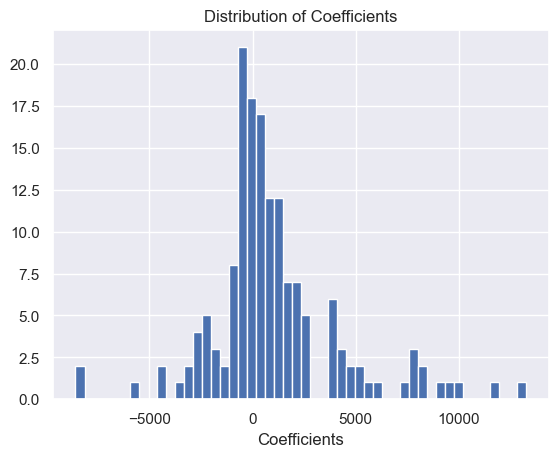

In [51]:
ridge_coef.hist(bins=50)
plt.title('Distribution of Coefficients')
plt.xlabel('Coefficients');

Similar performance to linear model.

## Lasso

In [52]:
# Instantiate
lasso = Lasso()
model = 'lasso'
params = []

# Fit
lasso.fit(X_train,y_train)

# Score train
train = lasso.score(X_train,y_train)

# Predict
y_pred = lasso.predict(X_val)

# Score test
test = lasso.score(X_val,y_val)

# MSE
mse = mean_squared_error(y_val,y_pred,squared=False)

# Add to list
scores.append([model,params,train,test,mse])

In [53]:
scores

[['lr', 'NA', 0.8894472186766949, 0.8342182814924959, 31904.60548995268],
 ['ridge', [], 0.8894469814275529, 0.8342708849271849, 31899.54333653741],
 ['lasso', [], 0.8894471706663667, 0.8342506260150067, 31901.49299486487]]

Similar performance.

## Elastic Net

In [54]:
enet = ElasticNet()
model = 'enet'
params = []
enet.fit(X_train,y_train)
train = enet.score(X_train,y_train)
y_pred = enet.predict(X_val)
test = enet.score(X_val,y_val)
mse = mean_squared_error(y_val,y_pred,squared=False)
scores.append([model,params,train,test,mse])
scores

[['lr', 'NA', 0.8894472186766949, 0.8342182814924959, 31904.60548995268],
 ['ridge', [], 0.8894469814275529, 0.8342708849271849, 31899.54333653741],
 ['lasso', [], 0.8894471706663667, 0.8342506260150067, 31901.49299486487],
 ['enet', [], 0.8685143395898783, 0.8387711237007962, 31463.459563712182]]

With default paramets, elastic net performs better.  The lower train score is actually preferable - it means the data is less overfit.  The MSE is about $500 better as well.  